# Scraping a table for the most important websites

In [1]:
import matplotlib.pyplot as plt
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://www.alexa.com/topsites'

In [3]:
driver = webdriver.Firefox()
driver.get(url)
html = driver.page_source
driver.close()

In [4]:
bs = BeautifulSoup(html, 'lxml')

In [5]:
data = []
for elem in bs.findAll('div', {'class':'tr site-listing'}):
    row = elem.get_text().split('\n')
    time = row[10].split(':')
    data.append([int(row[1]), row[4], row[7], 60*int(time[0])+int(time[1]), float(row[11]), float(row[12][:-1]), int(row[13].replace(',', ''))])

In [6]:
df = pd.DataFrame(data, columns=['Rank', 'Page', 'Descripition', 'Time', 'Pages', 'Search', 'Links'])
df.head()

,Rank,Page,Descripition,Time,Pages,Search,Links
0,1,Google.com,Enables users to search the world's informatio...,444,7.91,4.4,3706962
1,2,Youtube.com,"User-submitted videos with rating, comments, a...",499,4.70,15.9,2821501
2,3,Facebook.com,"A social utility that connects people, to keep...",673,4.34,8.3,7354992
3,4,Baidu.com,"The leading Chinese language search engine, pr...",425,5.57,8.8,181568
4,5,Wikipedia.org,A free encyclopedia built collaboratively usin...,253,3.28,66.5,2004735


In [7]:
df['Suffix'] = df['Page'].apply(lambda x: x.rsplit('.', 1)[-1])
df.to_csv('Most_Important_Websites.csv', index=False)

In [8]:
df.sort_values(by='Time', ascending=False).head(10)

,Rank,Page,Descripition,Time,Pages,Search,Links,Suffix
5,6,Reddit.com,User-generated news links. Votes promote stori...,943,9.96,15.8,495763,com
49,50,Aliexpress.com,"Launched in April 2010, AliExpress (www.aliexp...",850,11.06,11.5,48023,com
39,40,Xvideos.com,Streaming high and standard definition movies....,850,10.45,31.7,13429,com
2,3,Facebook.com,"A social utility that connects people, to keep...",673,4.34,8.3,7354992,com
15,16,Vk.com,Социальная сеть как средство для коммуникации ...,605,4.67,7.1,451295,com
43,44,Ebay.com,"International person to person auction site, w...",574,7.16,20.1,185808,com
37,38,Yahoo.co.jp,Japanese version of popular portal site.,558,8.39,12.4,130378,jp
32,33,Pornhub.com,Please contact dice[/at/]pornhub[/dot/]com for...,506,3.24,27.8,13900,com
1,2,Youtube.com,"User-submitted videos with rating, comments, a...",499,4.70,15.9,2821501,com
9,10,Taobao.com,"Launched in May 2003, Taobao Marketplace (www....",481,4.04,5.6,60893,com


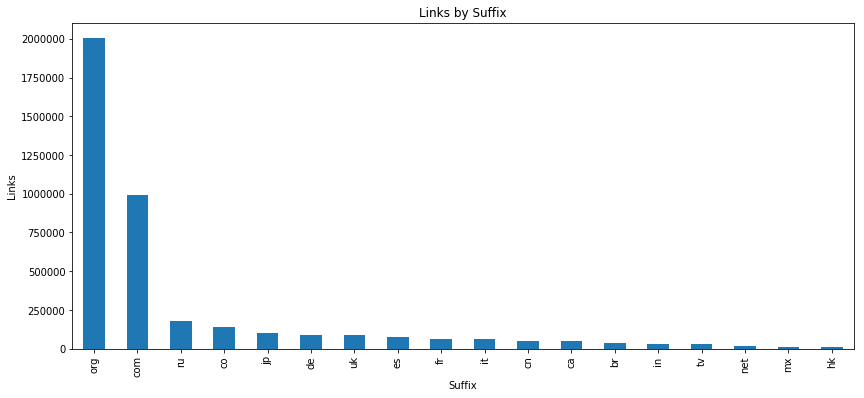

In [9]:
column = 'Links'
df.groupby('Suffix').agg({'Time':'mean', 'Pages':'mean', 'Search':'mean', 'Links':'mean'}).sort_values(column, ascending=False)[column].plot(kind='bar', figsize=(14,6), title='{} by Suffix'.format(column))
plt.ylabel(column)
plt.show()

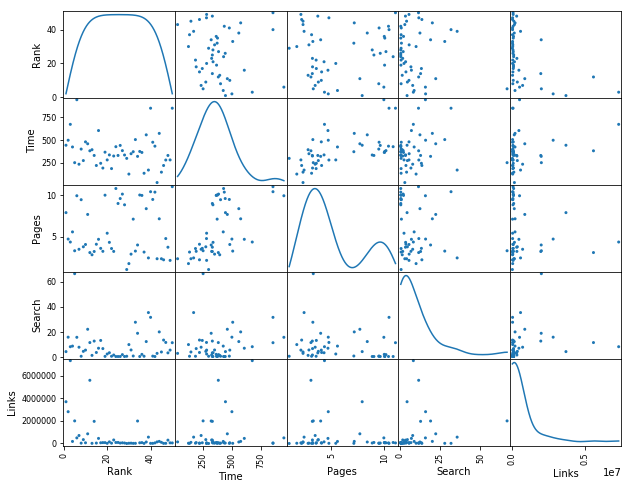

In [10]:
pd.plotting.scatter_matrix(df, figsize=(10,8), diagonal='kde', alpha=1)
plt.show()

In [11]:
from bokeh.charts import Scatter, show

p = Scatter(df, x='Time', y='Pages', title="Time vs Pages",
            xlabel="Time in seconds", ylabel="Pages")

show(p)